# Composing networks


In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

In [2]:
# # Plot two shallow neural networks and the composition of the two
def plot_neural_two_components(x_in, net1_out, net2_out, net12_out=None):

  # Plot the two networks separately
  fig, ax = plt.subplots(1,2)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  ax[0].plot(x_in, net1_out,'r-')
  ax[0].set_xlabel('Net 1 input'); ax[0].set_ylabel('Net 1 output')
  ax[0].set_xlim([-1,1]);ax[0].set_ylim([-1,1])
  ax[0].set_aspect(1.0)
  ax[1].plot(x_in, net2_out,'b-')
  ax[1].set_xlabel('Net 2 input'); ax[1].set_ylabel('Net 2 output')
  ax[1].set_xlim([-1,1]);ax[1].set_ylim([-1,1])
  ax[1].set_aspect(1.0)
  plt.show()

  if net12_out is not None:
    # Plot their composition
    fig, ax = plt.subplots()
    ax.plot(x_in ,net12_out,'g-')
    ax.set_xlabel('Net 1 Input'); ax.set_ylabel('Net 2 Output')
    ax.set_xlim([-1,1]);ax.set_ylim([-1,1])
    ax.set_aspect(1.0)
    plt.show()

In [3]:
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_network(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
    # Calculate the preactivation for each hidden unit
    z1 = theta_10 + theta_11 * x
    z2 = theta_20 + theta_21 * x
    z3 = theta_30 + theta_31 * x

    # Apply activation function to get hidden unit outputs
    h1 = activation_fn(z1)
    h2 = activation_fn(z2)
    h3 = activation_fn(z3)

    # Calculate final output as weighted sum of hidden units plus bias
    y = phi_0 + phi_1 * h1 + phi_2 * h2 + phi_3 * h3

    return y



In [4]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
    return np.maximum(0, preactivation)


In [5]:
# Now lets define some parameters and run the first neural network
n1_theta_10 = 0.0   ; n1_theta_11 = -1.0
n1_theta_20 = 0     ; n1_theta_21 = 1.0
n1_theta_30 = -0.67 ; n1_theta_31 =  1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3

# Now lets define some parameters and run the second neural network
n2_theta_10 =  -0.6 ; n2_theta_11 = -1.0
n2_theta_20 =  0.2  ; n2_theta_21 = 1.0
n2_theta_30 =  -0.5  ; n2_theta_31 =  1.0
n2_phi_0 = 0.5; n2_phi_1 = -1.0; n2_phi_2 = -1.5; n2_phi_3 = 2.0

# Display the two inputs
x = np.arange(-1, 1, 0.001)

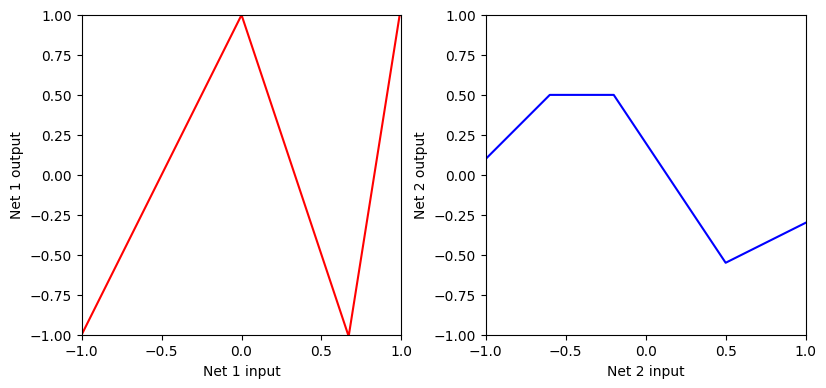

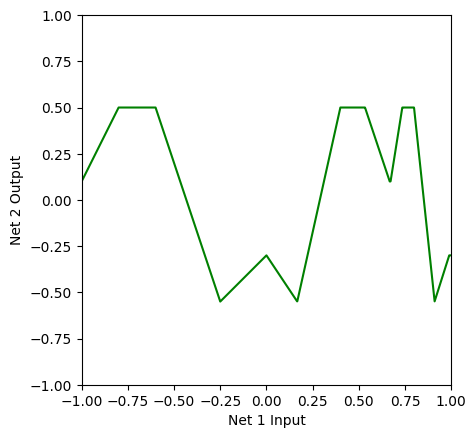

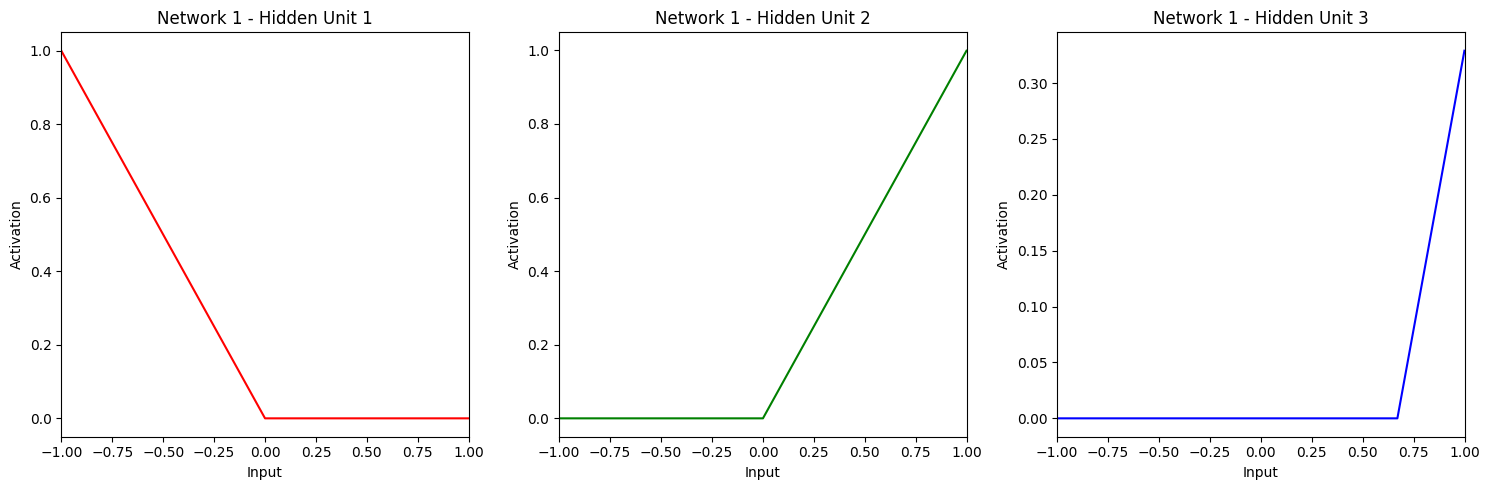

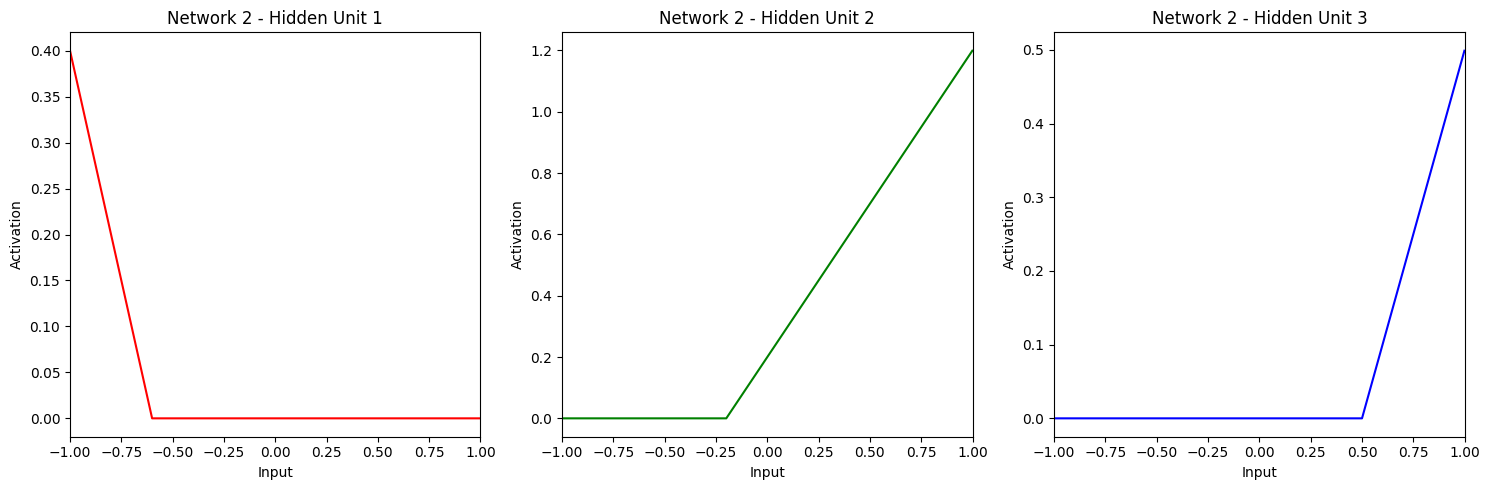

In [6]:

# Run the first network
net1_output = shallow_network(
    x,
    ReLU,
    n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3,
    n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31
)

# Run the second network
net2_output = shallow_network(
    x,
    ReLU,
    n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3,
    n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31
)

# For the composition, we need to run the output of network 1 through network 2
# But first we need to clip the output of net1 to be within [-1, 1] since that's our input range
net1_output_clipped = np.clip(net1_output, -1, 1)

# Now run these outputs through the second network
net12_output = shallow_network(
    net1_output_clipped,
    ReLU,
    n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3,
    n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31
)

# Plot the networks and their composition
plot_neural_two_components(x, net1_output, net2_output, net12_output)

# Let's also add a visualization of the hidden unit activations for better understanding
def plot_hidden_activations(x, network_params, network_name):
    theta_10, theta_11, theta_20, theta_21, theta_30, theta_31 = network_params

    # Calculate the preactivations for each hidden unit
    z1 = theta_10 + theta_11 * x
    z2 = theta_20 + theta_21 * x
    z3 = theta_30 + theta_31 * x

    # Apply activation function to get hidden unit outputs
    h1 = ReLU(z1)
    h2 = ReLU(z2)
    h3 = ReLU(z3)

    # Plot the hidden unit activations
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].plot(x, h1, 'r-')
    ax[0].set_title(f'{network_name} - Hidden Unit 1')
    ax[0].set_xlabel('Input')
    ax[0].set_ylabel('Activation')
    ax[0].set_xlim([-1, 1])

    ax[1].plot(x, h2, 'g-')
    ax[1].set_title(f'{network_name} - Hidden Unit 2')
    ax[1].set_xlabel('Input')
    ax[1].set_ylabel('Activation')
    ax[1].set_xlim([-1, 1])

    ax[2].plot(x, h3, 'b-')
    ax[2].set_title(f'{network_name} - Hidden Unit 3')
    ax[2].set_xlabel('Input')
    ax[2].set_ylabel('Activation')
    ax[2].set_xlim([-1, 1])

    plt.tight_layout()
    plt.show()

# Visualize hidden unit activations
plot_hidden_activations(
    x,
    [n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31],
    'Network 1'
)

plot_hidden_activations(
    x,
    [n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31],
    'Network 2'
)